# Lab Session 5 (Multiple Linear Regression)
# First Import Excel Document and View it

In [1]:
library("readxl")

# read the data from the excel spreadsheet::

# first the Blood Pressure Prediction Data
Lab4dataBP <- read_excel("MATPMD1LabSession5Data.xlsx",
sheet = "BP Prediction Data")

# now the Blood Pressure Training Data
Lab5dataBPTraining <- read_excel("MATPMD1LabSession5Data.xlsx",
sheet = "BP Training Data")

# and now the Timber
Lab5dataTimber <- read_excel("MATPMD1LabSession5Data.xlsx",
sheet = "Timber")

Registered S3 methods overwritten by 'tibble':
  method     from  
  format.tbl pillar
  print.tbl  pillar



In [13]:
# see what the column names in the data are
colnames(Lab4dataBP)
colnames(Lab5dataBPTraining)
colnames(Lab5dataTimber)


[1] "Age"     "Years"   "Weight"  "Height"  "Chin"    "Forearm" "Calf"   
 [8] "Pulse"   "Systol"  "Diastol"

[1] "Age"     "Years"   "Weight"  "Height"  "Chin"    "Forearm" "Calf"   
 [8] "Pulse"   "Systol"  "Diastol"

[1] "Diameter" "Height"   "Volume"   "Grade"    "Location"

In [14]:
View(Lab4dataBP)
View(Lab5dataBPTraining)
View(Lab5dataTimber)

Age,Years,Weight,Height,Chin,Forearm,Calf,Pulse,Systol,Diastol
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
24,5,56.0,1561,3.3,1.3,4.3,68,125,75
24,1,61.0,1619,3.7,3.0,4.3,52,148,120
25,1,65.0,1566,9.0,12.7,20.7,72,140,78
27,19,62.0,1639,3.0,3.3,5.7,72,106,72
31,6,65.0,1540,10.3,9.0,10.0,76,124,70
37,17,57.0,1473,6.0,5.3,11.7,72,114,80
38,11,57.0,1566,3.0,3.0,3.0,60,126,72
41,25,62.5,1637,6.0,5.3,8.0,76,112,80
41,32,68.0,1528,10.0,5.0,11.3,60,128,82


Age,Years,Weight,Height,Chin,Forearm,Calf,Pulse,Systol,Diastol
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
21,1,71.0,1629,8.0,7.0,12.7,88,170,76
22,6,56.5,1569,3.3,5.0,8.0,64,120,60
28,5,53.0,1494,7.3,4.7,8.0,64,120,76
28,25,53.0,1568,3.7,4.3,0.0,80,108,62
32,13,57.0,1530,5.7,4.0,6.0,60,134,64
33,13,66.5,1622,6.0,5.7,8.3,68,116,76
33,10,59.1,1486,6.7,5.3,10.3,72,114,74
34,15,64.0,1578,3.3,5.3,7.0,88,130,80
35,18,69.5,1645,9.3,5.0,7.0,60,118,68


Diameter,Height,Volume,Grade,Location
<dbl>,<dbl>,<dbl>,<chr>,<chr>
8.3,70,6.3,Fair,Lower
12.0,75,19.1,Med,Upper
10.8,83,19.7,Med,Lower
13.8,64,24.9,Good,Upper
10.5,72,16.4,Good,Upper
13.3,86,27.4,Med,Lower
11.1,80,22.6,Fair,Lower
14.5,74,36.3,Med,Upper
8.6,65,6.3,Fair,Upper


# Question 1

In [7]:
#Multi linear Regression model for training Data
#Trained/Tuned in example 10.2.8 to select years & Weight as best fit.
library("readxl")

Lab5dataBPTraining <- read_excel("MATPMD1LabSession5Data.xlsx",
sheet = "BP Training Data")

bp_Model<-lm(data=Lab5dataBPTraining, Systol ~ Years+Weight)

summary(bp_Model)


Call:
lm(formula = Systol ~ Years + Weight, data = Lab5dataBPTraining)

Residuals:
     Min       1Q   Median       3Q      Max 
-17.4451  -7.3573   0.0546   7.0532  23.1420 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  54.2960    17.2048   3.156 0.004767 ** 
Years        -0.6256     0.2805  -2.230 0.036765 *  
Weight        1.3125     0.2991   4.388 0.000257 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 10.24 on 21 degrees of freedom
Multiple R-squared:  0.4783,	Adjusted R-squared:  0.4286 
F-statistic: 9.627 on 2 and 21 DF,  p-value: 0.001078


In [12]:
# Test model above on Prediction data and See if it generate similar 
# Results for unseen data
# Note: Remember you are not building a new model for the test/prediction Data

Lab4dataBP <- read_excel("MATPMD1LabSession5Data.xlsx",
sheet = "BP Prediction Data")

attach(Lab4dataBP)
colnames(Lab4dataBP)

#sample size
n <- length(Systol)




The following objects are masked from Lab4dataBP (pos = 3):

    Age, Calf, Chin, Diastol, Forearm, Height, Pulse, Systol, Weight,
    Years


The following objects are masked from Lab4dataBP (pos = 4):

    Age, Calf, Chin, Diastol, Forearm, Height, Pulse, Systol, Weight,
    Years




[1] "Age"     "Years"   "Weight"  "Height"  "Chin"    "Forearm" "Calf"   
 [8] "Pulse"   "Systol"  "Diastol"

[1] 15


In [21]:
# Model Equation
bp_pred <- 54.2960 - (0.6256*Years) + (1.3125*Weight)



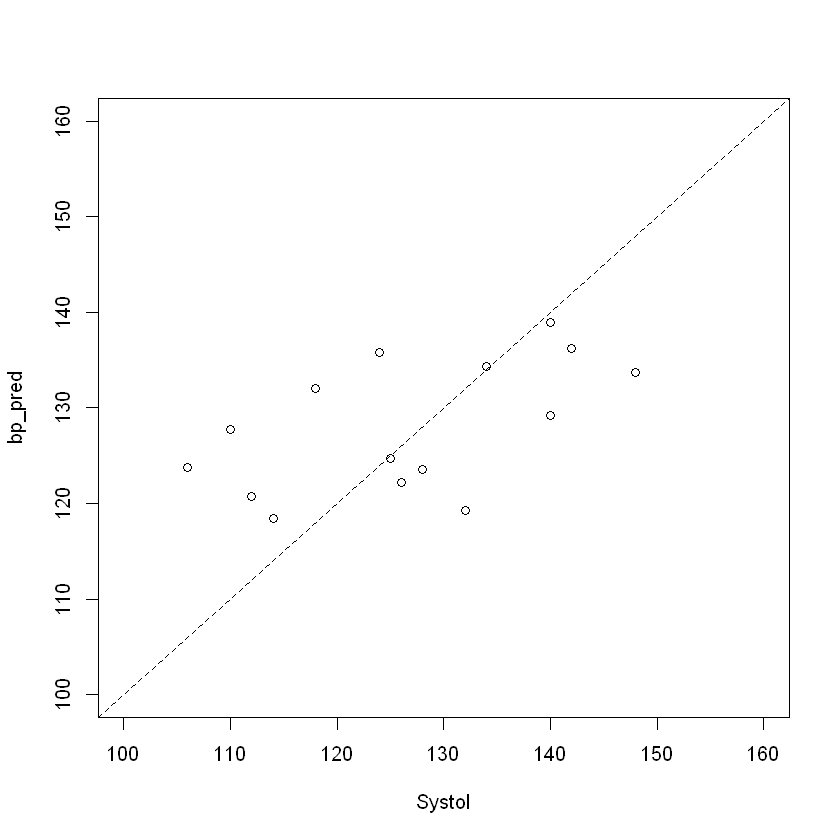

In [22]:
# Plot Predicted Values using Model Equation
plot(Systol, bp_pred, xlim = c(100,160), ylim = c(100,160))
abline(0,1,lty=2) #line through X,y axis to evaluate predictions


<h2>Observation::</h2>
<h2> Only About 3 predictions were precise to a high degree </h2>
<h3> In general the accuracy is a bit poor/average</h3>
<p> But, to do this more scientifically we can "measure the predictive performance of the model" by comparing
the 'predicted values' against the 'observed values' of the SBP and calculate the 
    <i>'coefficient of determination' -> (R^2)</i></p>

In [27]:
# Remember Rsquared -> " R2 = 1 - (SSreg / SStot) ""

# find SStot
SStot <- sum((Systol)^2)-(sum(Systol))^2/n  #rem n = sample size
paste("SStot is:",SStot)

# Find SSres
bdPredDiff <- bp_pred-Systol
SSres <- sum(bdPredDiff^2) -(sum(bdPredDiff)^2/n)
paste("SSres is:",SSres)

R2 <- 1 - (SSres/SStot)
paste("R2 is:",R2)

detach(Lab4dataBP)

#Thushighlighted in observation R2 value is quite poor

[1] "SStot is: 2295.60000000001"

[1] "SSres is: 1582.596881439"

[1] "R2 is: 0.31059553866571"

# Question 2

In [28]:
#First Return to Timber example from 10.27
